In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("BlackFriday.csv")
df.shape

(537577, 12)

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [6]:
df.drop(['Product_Category_2', 'Product_Category_3'], axis=1,inplace=True)


In [7]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [8]:
df['User_ID'].nunique()

5891

In [9]:
df['Product_ID'].nunique()


3623

In [10]:
df['Age'].unique()


array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [11]:
df["Occupation"].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [12]:
df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9], dtype=int64)

In [13]:
for col in df.columns:
    print(f"{col} : {df[col].nunique()}")

User_ID : 5891
Product_ID : 3623
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 18
Purchase : 17959


In [14]:
# analyzing gender column

data = pd.DataFrame({'Ratio': [len(df[df['Gender'] == 'M']),len(df[df['Gender'] == 'F'])]},index=['Male','Female'])

<AxesSubplot:ylabel='Ratio'>

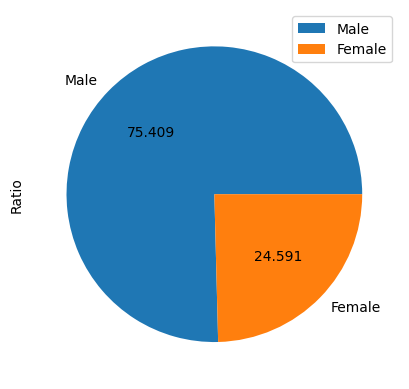

In [15]:
data.plot.pie(y = 'Ratio',autopct="%.3f")

<AxesSubplot:title={'center':'Bar Graph'}, xlabel='Gender'>

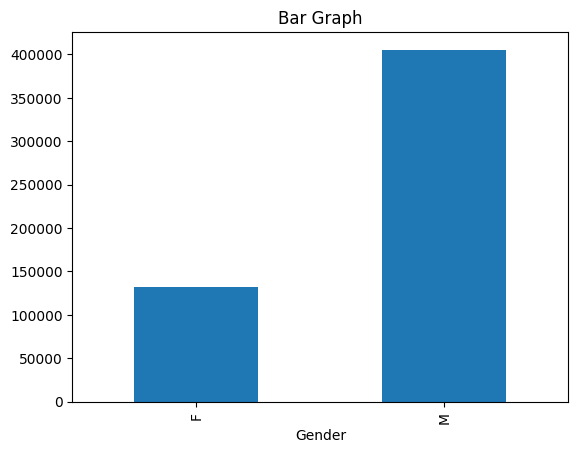

In [16]:
df.groupby('Gender').size().plot(kind='bar',title="Bar Graph")

<AxesSubplot:ylabel='Purchase'>

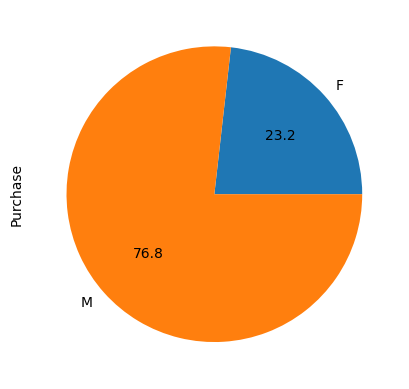

In [17]:
df.groupby('Gender').sum()['Purchase'].plot(kind = 'pie',autopct="%.1f")

<AxesSubplot:ylabel='Purchase'>

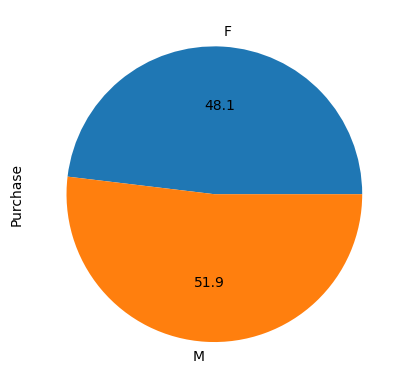

In [18]:
df.groupby('Gender').mean()['Purchase'].plot(kind = 'pie',autopct="%.1f")


<AxesSubplot:title={'center':'Purchase Distribution by Age'}, xlabel='Age'>

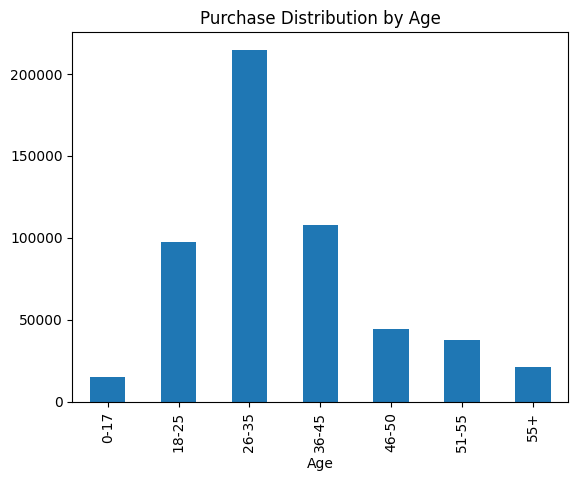

In [19]:
#analyzing age and marital status
df.groupby('Age').size().plot(kind = 'bar',title="Purchase Distribution by Age")

In [20]:
lst = []
for i in df['Age'].unique():
    lst.append([i,df[df['Age']== i]['Product_ID'].nunique()])


<AxesSubplot:xlabel='Age'>

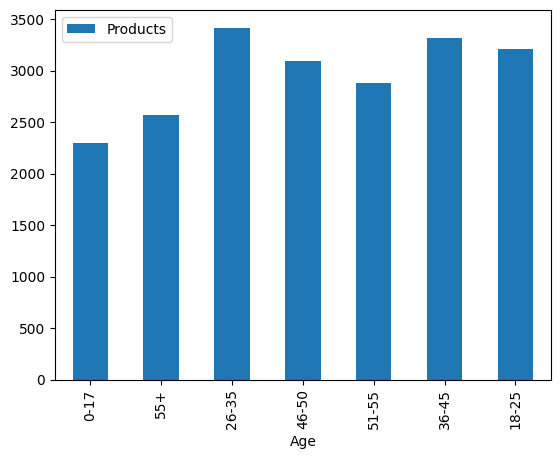

In [21]:
data = pd.DataFrame(lst,columns=['Age','Products'])
data.plot.bar(x = "Age")

<AxesSubplot:xlabel='Age'>

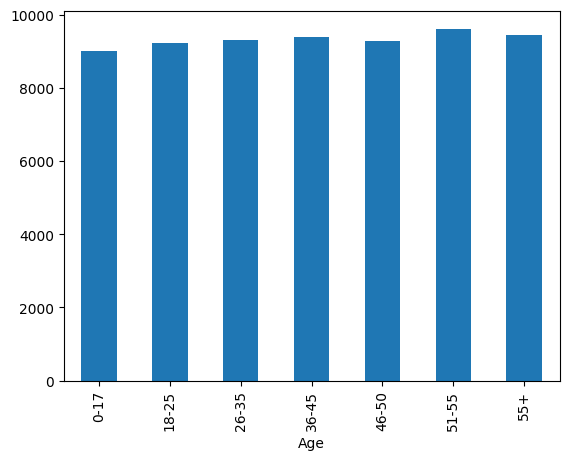

In [22]:
df.groupby('Age').mean()['Purchase'].plot(kind = 'bar')

<AxesSubplot:ylabel='None'>

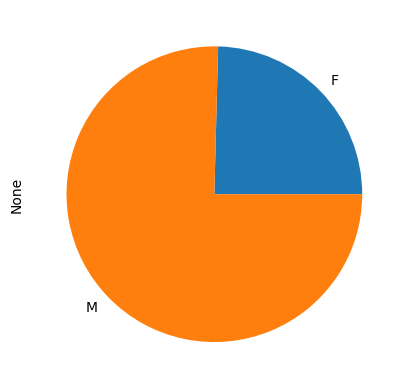

In [23]:
df.groupby("Gender").size().plot(kind = 'pie')

<AxesSubplot:ylabel='None'>

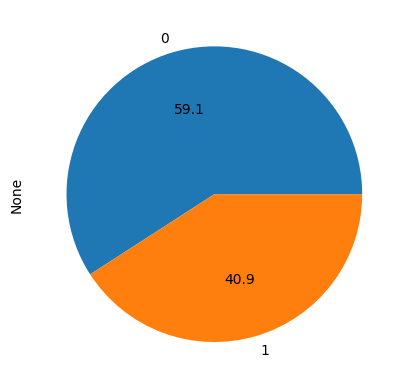

In [24]:
df.groupby("Marital_Status").size().plot(kind = 'pie',autopct="%.1f")

<AxesSubplot:xlabel='Age', ylabel='count'>

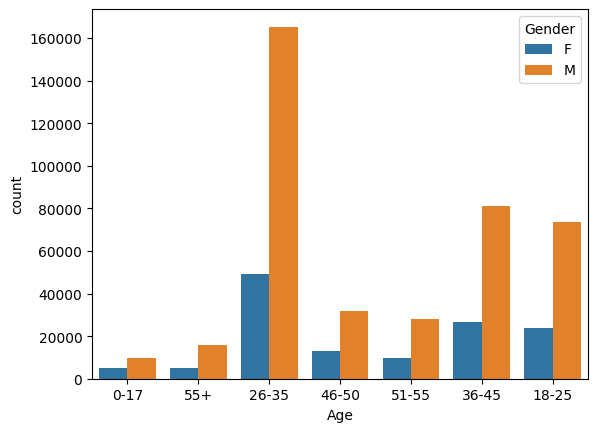

In [25]:
#analyzing multiple columns
import seaborn as sns
sns.countplot(x = "Age",hue="Gender",data = df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

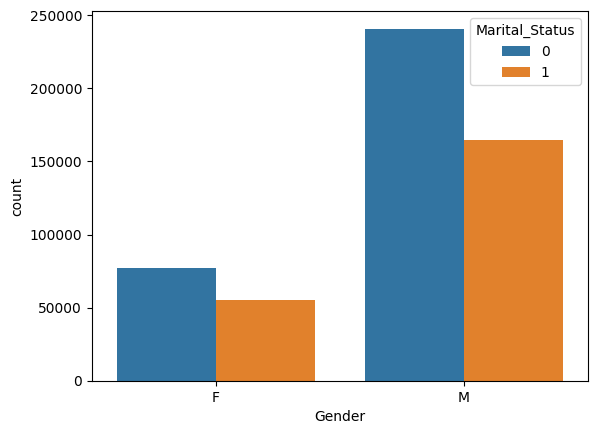

In [26]:
sns.countplot(x = "Gender",hue="Marital_Status",data = df)


<AxesSubplot:xlabel='City_Category', ylabel='count'>

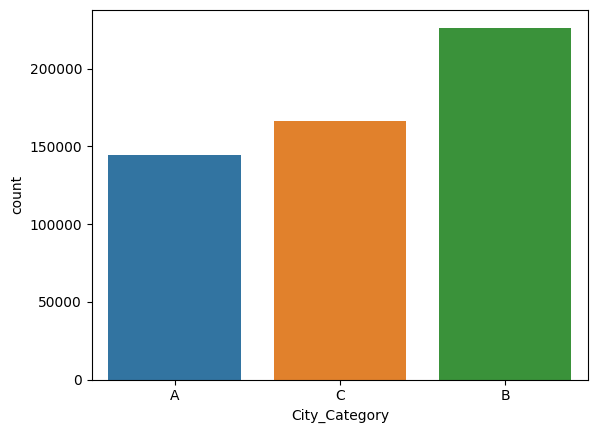

In [27]:
sns.countplot(x = df["City_Category"])

<AxesSubplot:ylabel='None'>

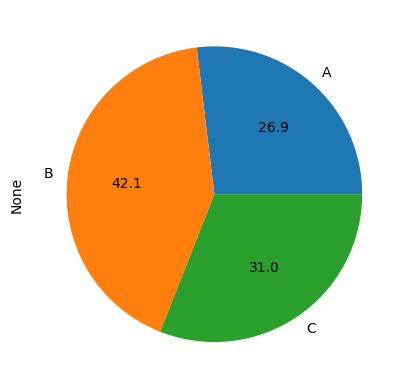

In [28]:
df.groupby("City_Category").size().plot(kind = "pie",autopct = "%.1f")

<AxesSubplot:xlabel='City_Category', ylabel='count'>

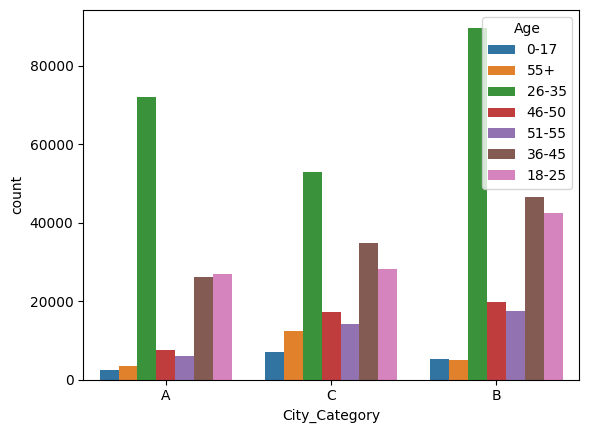

In [29]:
sns.countplot(x = "City_Category",hue="Age",data = df)

<AxesSubplot:ylabel='Purchase'>

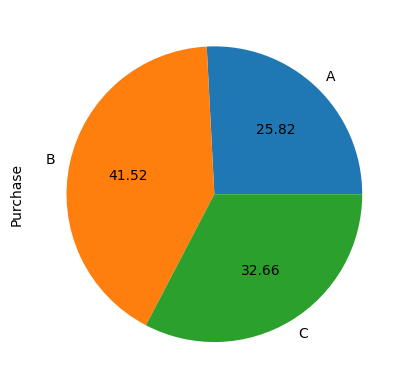

In [30]:
df.groupby("City_Category").sum()["Purchase"].plot(kind = "pie",autopct="%.2f")

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

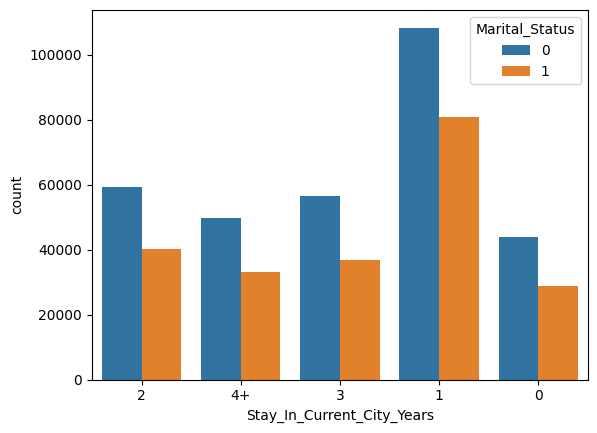

In [31]:
# occupation and product analysis
sns.countplot(x = df['Stay_In_Current_City_Years'],hue="Marital_Status",data = df)

<AxesSubplot:xlabel='Occupation'>

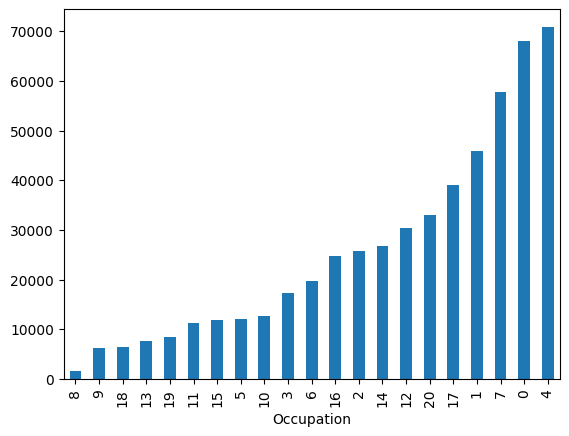

In [32]:
df.groupby("Occupation").size().sort_values().plot(kind="bar")

In [33]:
df.groupby("Occupation").nunique()["Product_ID"]

Occupation
0     3243
1     3020
2     2892
3     2657
4     3174
5     2344
6     2724
7     3070
8     1026
9     1820
10    2110
11    2235
12    2664
13    1946
14    2680
15    2168
16    2863
17    2831
18    2047
19    2303
20    3147
Name: Product_ID, dtype: int64

In [34]:
# combining age and marital status
l = []
for i in range(len(df)):
    l.append(df['Gender'][i]+"_"+str(df["Marital_Status"][i]))
df['Marital_Gender'] = l

In [35]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Marital_Gender
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M_0


<AxesSubplot:xlabel='Marital_Gender', ylabel='count'>

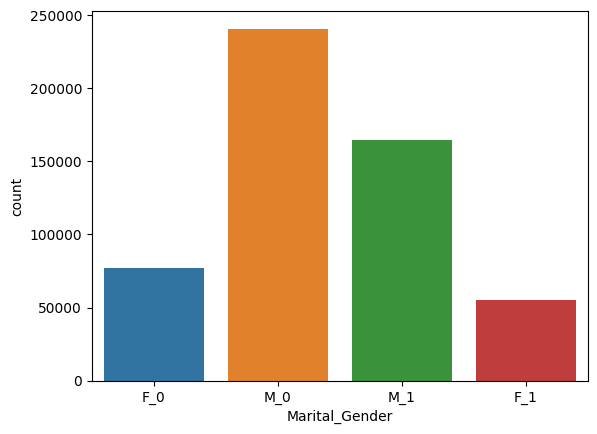

In [36]:
sns.countplot(x = df["Marital_Gender"])

<AxesSubplot:xlabel='Age', ylabel='count'>

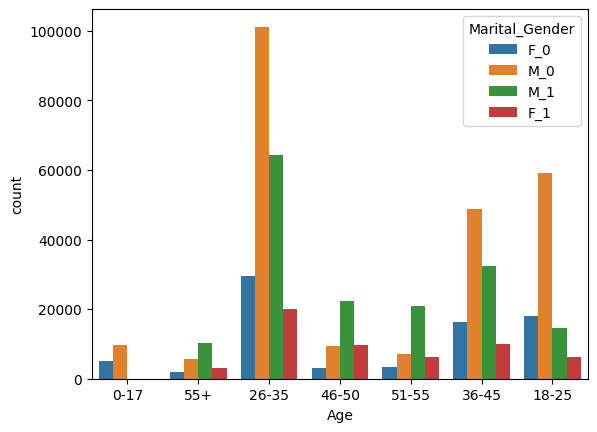

In [37]:
sns.countplot(x = df['Age'],hue=df['Marital_Gender'])

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

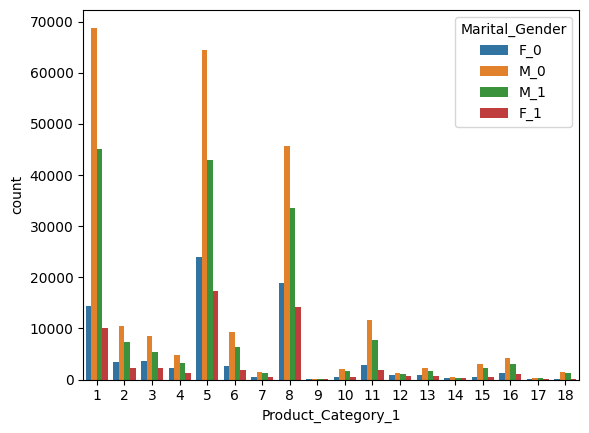

In [39]:
sns.countplot(x = df['Product_Category_1'],hue=df['Marital_Gender'])

<AxesSubplot:xlabel='City_Category', ylabel='count'>

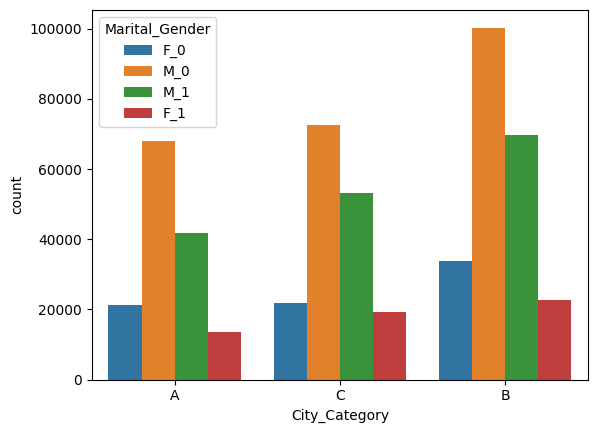

In [41]:
sns.countplot(x = df['City_Category'],hue=df["Marital_Gender"])